In [1]:
import numpy as np
from lib.blackjack import BlackjackEnv
from lib import plotting
import matplotlib.pyplot as plt
from collections import defaultdict

# 1) Implement the Monte Carlo Prediction to estimate state-action values

In [2]:
env = BlackjackEnv()

In [3]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    # This means that we should calculate the return ina  incremental fashion 
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    for i_eps in range(num_episodes):
        # Epsiodes Generation
        episode = []
        obs = env.reset()
        done = False
        while not done:
            action = policy(obs)
            next_s, r, done, _ = env.step(action)
            episode.append((obs, action, r))
            obs = next_s
        # Policy Evaluation
        g = 0
        visited_states = []
        for i,eps in enumerate(episode[::-1]):
            first_occurences = [e[0] for e in episode[:len(episode) - i - 1]]
            state = eps[0]
            reward = eps[2]
            g += (discount_factor**(len(episode) - i -1))*  reward   
            if state not in first_occurences:
                returns_sum[state] += g
                returns_count[state] += 1.0
                V[state] = returns_sum[state] / returns_count[state]
    return V

In [4]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

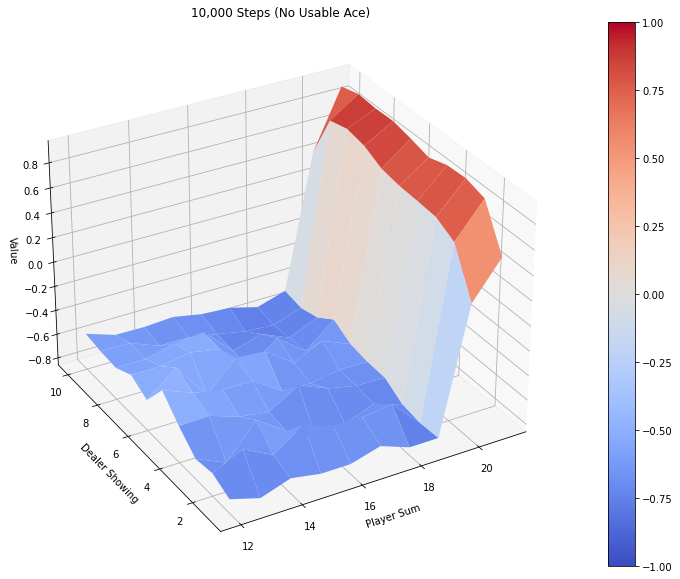

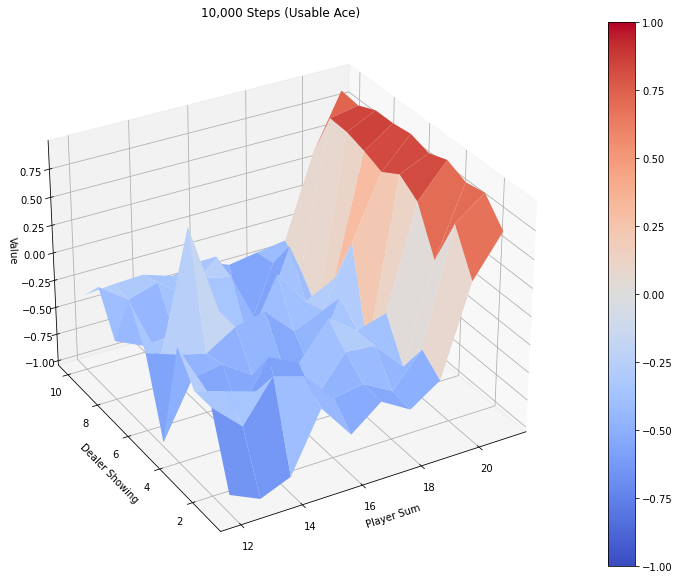

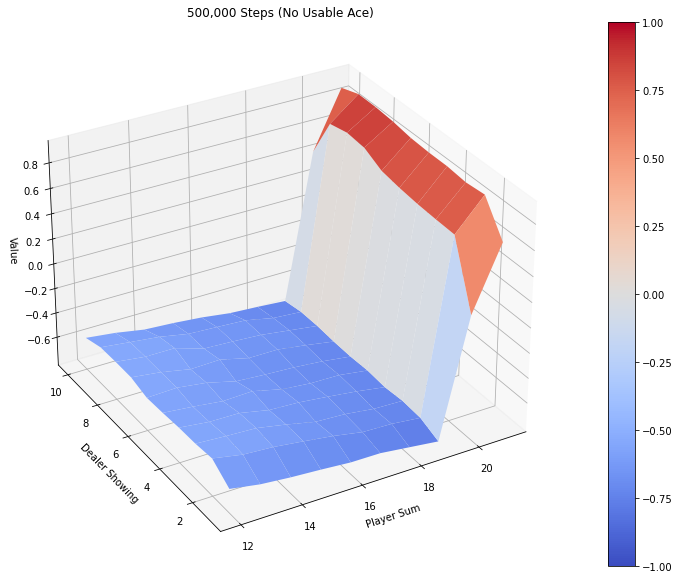

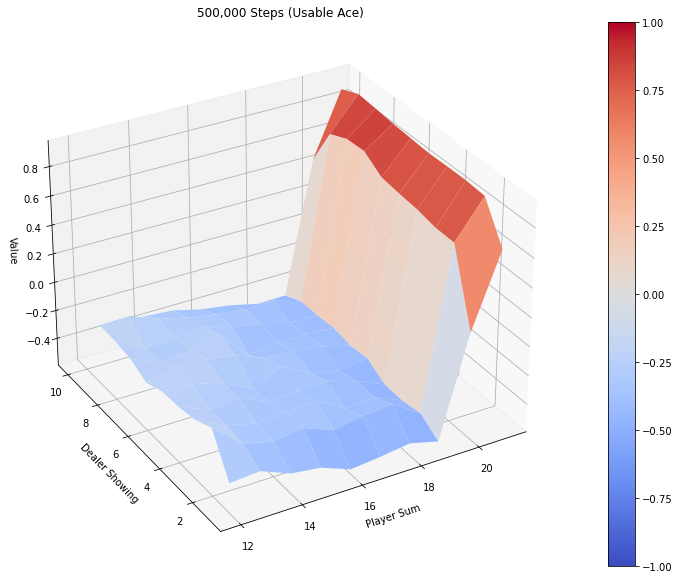

In [5]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")